In [1]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import json, random
import matplotlib.colors as mcolors

In [2]:
options = np.sort(os.listdir("../2par/temp"))
for option in options:
    if len(os.listdir("../2par/temp/" + option)) != 0 and "VIT" in option:
        print(option)

20231010_VIT_DESY3
20231010_VIT_DESY3_128times
20231010_VIT_DESY3_16times
20231010_VIT_DESY3_32times
20231010_VIT_DESY3_4times
20231010_VIT_DESY3_64times
20231010_VIT_DESY3_8times
20231010_VIT_DESY3_all
20231010_VIT_DESY3_double
20231010_VIT_DESY3_half
20231010_VIT_DESY3_half_twice
20231010_VIT_DESY3_onebin
20231010_VIT_DESY3_twice
20231010_VIT_LSSTY1
20231010_VIT_LSSTY10
20231010_VIT_LSSTY10_128times
20231010_VIT_LSSTY10_8times
20231010_VIT_LSSTY10_double
20231010_VIT_LSSTY10_half
20231010_VIT_LSSTY10_half_twice
20231010_VIT_LSSTY10_twice
20231010_VIT_LSSTY1_128times
20231010_VIT_LSSTY1_4times
20231010_VIT_LSSTY1_64times
20231010_VIT_LSSTY1_all
20231010_VIT_LSSTY1_double
20231010_VIT_LSSTY1_half
20231010_VIT_LSSTY1_half_twice
20231010_VIT_LSSTY1_onebin
20231010_VIT_LSSTY1_twice


# Vision Transformer

In [8]:
fold = "../2par/temp"
def get_history_file(model_name):
    chkpts = os.listdir(f"{fold}/{model_name}")
    chkpts = [int(chkpt.split("-")[1]) for chkpt in chkpts if "checkpoint" in chkpt]
    highest_chkpt = max(chkpts)
    # print(highest_chkpt)
    return highest_chkpt, f"{fold}/{model_name}/checkpoint-{highest_chkpt}/trainer_state.json"

In [9]:
def get_epoch_to_checkpoint_factor(model_name):
    chkpts = os.listdir(f"{fold}/{model_name}")
    chkpts = [int(chkpt.split("-")[1]) for chkpt in chkpts if "checkpoint" in chkpt]
    lowest_chkpt = min(chkpts)
    # print(lowest_chkpt)
    return 1 / lowest_chkpt

In [12]:
run_name = "20231010_VIT_DESY3_64times"
_, history_file = get_history_file(run_name)

best_epoch_to_checkpoint = get_epoch_to_checkpoint_factor(run_name)

with open(history_file, "r") as f:
    jsondata = json.load(f)
    best_metric = jsondata["best_metric"]
    best_model_checkpoint = jsondata["best_model_checkpoint"]
    best_epoch = int(int(best_model_checkpoint.split("-")[1]) * best_epoch_to_checkpoint)
    print(best_metric, best_model_checkpoint, best_epoch)
    
    history = jsondata["log_history"]
    vit_epochs = np.array([entry["epoch"] for entry in history])
    vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])

-0.8185338377952576 ./2par/temp/20231010_VIT_DESY3_64times/checkpoint-77 77


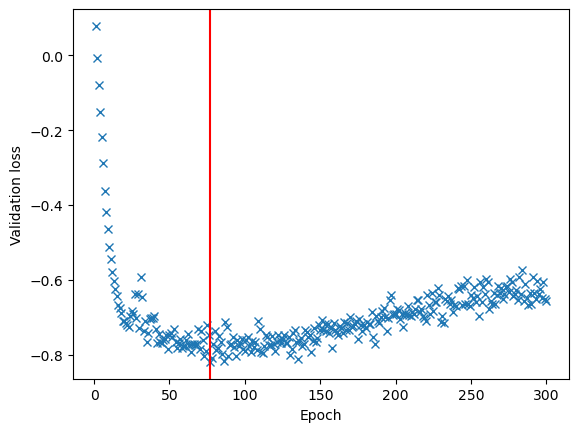

In [13]:
plt.figure()
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none")
plt.axvline(best_epoch, color="red")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

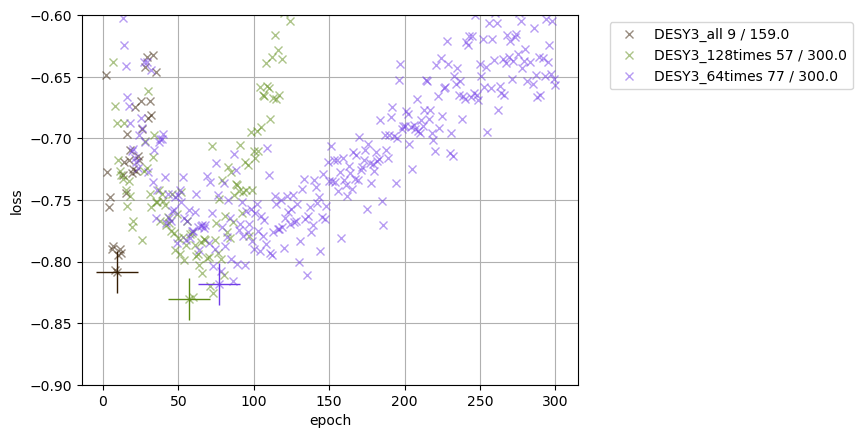

In [18]:
plt.figure()
colors = list(mcolors.XKCD_COLORS.keys())
# colors = list(mcolors.TABLEAU_COLORS.keys())
# colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(colors)
# models = np.sort(os.listdir(fold))
models = ["20231010_VIT_DESY3_all", "20231010_VIT_DESY3_128times", "20231010_VIT_DESY3_64times"]
for run_name, color in zip(models, colors):
    try:
        # if "DES" not in run_name:
        #     continue
        if "lock" in run_name or "done" in run_name:
            continue
        # print(run_name)
        t_eps, history_file = get_history_file(run_name)
        best_epoch_to_checkpoint = get_epoch_to_checkpoint_factor(run_name)
        t_eps *= best_epoch_to_checkpoint

        with open(history_file, "r") as f:
            jsondata = json.load(f)
            best_metric = jsondata["best_metric"]
            best_model_checkpoint = jsondata["best_model_checkpoint"]
            best_epoch = int(int(best_model_checkpoint.split("-")[1]) * best_epoch_to_checkpoint)
            # print(best_metric, best_model_checkpoint, best_epoch)

            history = jsondata["log_history"]
            vit_epochs = np.array([entry["epoch"] for entry in history])
            vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])
        plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", alpha=0.5,\
                 label=run_name[run_name.index("VIT_")+4:] + f" {best_epoch} / {t_eps}", color=color)
        plt.plot(best_epoch, best_metric, marker="+", ls="none", color=color, markersize=30)
    except:
        print("not plotting", run_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xlim(5, 60)
plt.ylim(-0.9, -0.6)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.close()

# ResNet

In [138]:
np.sort(os.listdir("../new/temp")), len(os.listdir("../new/temp"))

(array(['20230915_VIT_DESY3', '20230915_VIT_DESY3_16times',
        '20230915_VIT_DESY3_4times', '20230915_VIT_DESY3_8times',
        '20230915_VIT_DESY3_double', '20230915_VIT_DESY3_half',
        '20230915_VIT_DESY3_half_twice', '20230915_VIT_DESY3_twice',
        '20230915_VIT_LSSTY1', '20230915_VIT_LSSTY10',
        '20230915_VIT_LSSTY10_4times', '20230915_VIT_LSSTY10_double',
        '20230915_VIT_LSSTY10_half', '20230915_VIT_LSSTY10_half_twice',
        '20230915_VIT_LSSTY10_twice', '20230915_VIT_LSSTY1_4times',
        '20230915_VIT_LSSTY1_double', '20230915_VIT_LSSTY1_half',
        '20230915_VIT_LSSTY1_half_twice', '20230915_VIT_LSSTY1_twice',
        '20230915_resnet_DESY3', '20230915_resnet_DESY3_4times',
        '20230915_resnet_DESY3_double', '20230915_resnet_DESY3_half',
        '20230915_resnet_DESY3_half_twice', '20230915_resnet_DESY3_onebin',
        '20230915_resnet_LSSTY1', '20230915_resnet_LSSTY10',
        '20230915_resnet_LSSTY10_4times', '20230915_resnet_LSSTY10_

In [152]:
options = np.sort(os.listdir("../new/temp"))
for option in options:
    if os.path.exists("../new/temp/" + option + "/chkpts") and \
      len(os.listdir("../new/temp/" + option + "/chkpts")) != 0 \
      and "resnet" in option:
        print(option)

20230915_resnet_DESY3
20230915_resnet_DESY3_double
20230915_resnet_DESY3_half
20230915_resnet_DESY3_half_twice
20230915_resnet_LSSTY1
20230915_resnet_LSSTY10
20230915_resnet_LSSTY10_half
20230915_resnet_LSSTY10_half_twice
20230915_resnet_LSSTY1_half
20230915_resnet_LSSTY1_half_twice


In [153]:
def get_history_file(model_name):
    # return glob.glob(f'../temp/{model_name}/*logs*')
    return glob.glob(f'../new/temp/{model_name}/*logs*')

In [154]:
# history_files = get_history_file("20230813_cnn_DES")
history_files = get_history_file("20230915_resnet_LSSTY1")

rn_val_loss = []
rn_epochs = []
for history_file in history_files:
    with open(history_file, "r") as f:
        for line in f.readlines():
            if not "Val Loss" in line:
                continue
            rn_val_loss += [float(line.split()[-1])]
            rn_epochs += [int(line.split()[1])]

best_epoch = rn_epochs[np.argmin(rn_val_loss)]

len(rn_epochs), len(rn_val_loss), best_epoch

(19, 19, 14)

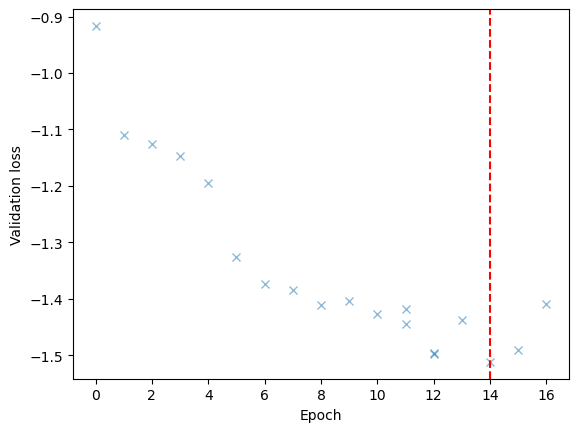

In [155]:
plt.figure()
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", alpha=0.5)
plt.axvline(x=best_epoch, color="red", ls="--", label="Best epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

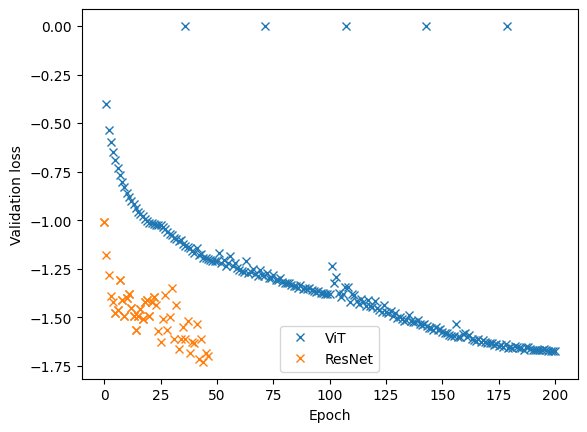

In [17]:
plt.figure
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", label="ViT")
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", label="ResNet")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()
plt.close()